In [799]:
import os
import tempfile
import logging
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Number of original features: 80
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Difference between:   
 max and min values: 720100 
 max and median values: 592000.0 
 median and min values: 128100.0


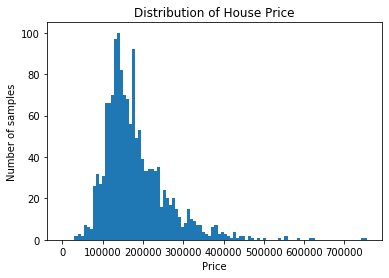

In [800]:
csv_train_file="/home/renato/Desktop/idwall/data/train.csv"
csv_test_file="/home/renato/Desktop/idwall/data/test.csv"

df_train_original=pd.read_csv(csv_train_file)
df_test_original=pd.read_csv(csv_test_file)

train_ID = df_train_original['Id']
test_ID = df_test_original['Id']

df_train_original.drop("Id", axis = 1, inplace = True)
df_test_original.drop("Id", axis = 1, inplace = True)

print("Number of original features: {}".format(len(df_train_original.columns)))

y_label='SalePrice'
y_column = df_train_original[y_label]

plt.title("Distribution of House Price")
plt.ylabel("Number of samples");
plt.xlabel("Price")
plt.hist(y_column, bins=100, range=(0,y_column.max()))

print(y_column.describe())

y_count = y_column.count()
max_min_diff = y_column.max()-y_column.min()
max_med_diff = y_column.max()-y_column.median()
med_min_diff = y_column.median()-y_column.min()

print("Difference between:   \n max and min values: {} \n max and median values: {} \n median and min values: {}".format(max_min_diff,max_med_diff,med_min_diff))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  1.,  0.,  2.,  4.,  6.,
         5.,  2., 11., 22., 22., 20., 15., 21., 40., 35., 52., 39., 64.,
        55., 69., 69., 57., 38., 50., 41., 40., 43., 59., 37., 41., 39.,
        22., 28., 22., 25., 20., 21., 22., 20., 26., 17.,  9., 16., 12.,
        16., 11., 13., 13., 10.,  8.,  7.,  4.,  5.,  5.,  7., 13.,  5.,
         9.,  1.,  7.,  4.,  3.,  3.,  1.,  2.,  2.,  4.,  4.,  3.,  3.,
         4.,  2.,  3.,  0.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,
         0.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
         70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.,
        105000., 110000., 115000., 120000., 125000., 130000., 135000.,
        140000., 145000., 150000., 155000., 160000., 165000., 170000.,
        175000., 180000., 185000., 190000., 195000., 200000., 205000.,
        

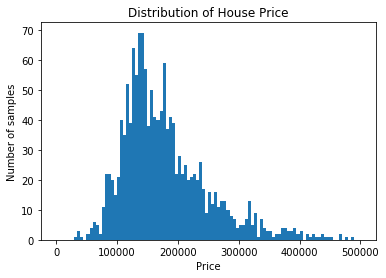

In [801]:
plt.title("Distribution of House Price")
plt.ylabel("Number of samples");
plt.xlabel("Price")
max_limit=500000
plt.hist(y_column, bins=100, range= (0,max_limit))

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]),
 array([500000., 502550., 505100., 507650., 510200., 512750., 515300.,
        517850., 520400., 522950., 525500., 528050., 530600., 533150.,
        535700., 538250., 540800., 543350., 545900., 548450., 551000.,
        553550., 556100., 558650., 561200., 563750., 566300., 568850.,
        571400., 573950., 576500., 579050., 581600., 584150., 586700.,
        589250., 591800., 594350., 596900., 599450., 602000., 604550.,
        607100., 609650., 612200., 614750., 617300., 619850., 622400.,
        624950., 627500., 630050., 632600., 635150., 637700., 640250.,
        642800., 645350., 647900., 650450., 653000., 655550., 658100.,
        660650., 66

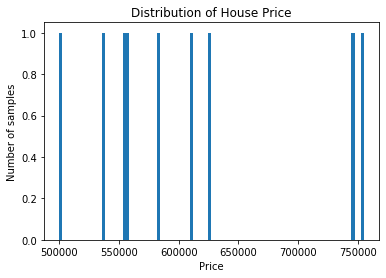

In [802]:
import numpy as np
plt.title("Distribution of House Price")
plt.ylabel("Number of samples");
plt.xlabel("Price")
plt.hist(y_column, bins=100, range= (max_limit, y_column.max()))

np.histogram(np.array(y_column), bins=100, range= (max_limit, y_column.max()))

In [803]:
import numpy as np
#casas com preço acima de max_limit sao outliers! contar o numero de amostras outliers
#em torno da metade dos valores possiveis (3000)
arr_hist = np.histogram(np.array(y_column), bins=100, range= (max_limit, y_column.max()))

outliers_percentage = arr_hist[0].sum()/y_column.count()
print("Percentage of outliers from all samples: {} %".format(outliers_percentage*100))
# menos que 1% de todas as amostras do train set foram excluidas! 
print("Less than 1% of the dataset was excluded!")

Percentage of outliers from all samples: 0.6164383561643836 %
Less than 1% of the dataset was excluded!


In [804]:
import numpy as np

#Use only representative instances, shares above a threshold value
outliers_index = np.argwhere(y_column > max_limit)

outliers_index = outliers_index.reshape(1,len(outliers_index))[0]

m_selected_inst= len(y_column) - len(outliers_index)

y_column.drop(outliers_index, axis = 0, inplace=True)

df_train_original.drop(outliers_index, axis =0, inplace=True)

In [805]:
df_train_drop = df_train_original.copy()

#removing features with many missing data in this case:
# 'LotFrontage' and 'GarageYrBlt'
many_missing_data_labels = ['LotFrontage','GarageYrBlt']
df_train_drop = df_train_drop.drop(columns=many_missing_data_labels)

#removing samples whose features have low relevance and very few missing data
# (this case, only 8 total samples excluded)
few_missing_data_labels = ['MasVnrType','MasVnrArea']

indexes_missing_data={}
for label in few_missing_data_labels:
    indexes_missing_data[label]=[]
    for i in range(len(df_train_drop[label].values)):
        if type(df_train_drop[label].values[i])!=str and np.isnan(df_train_drop.iloc[i][label]):
            indexes_missing_data[label].append(i)
    print("Indices das amostras com missing data para feature {}: {}".format(label,indexes_missing_data[label]))


s_all_indexes = set([])
for label in indexes_missing_data:
    s_label = set(indexes_missing_data[label])
    s_all_indexes = s_all_indexes.union(s_label)

df_train_drop.drop(sorted(list(s_all_indexes)), axis=0 ,inplace = True)  
y_column.drop(sorted(list(s_all_indexes)), axis=0, inplace = True)

transf_csv_file = csv_train_file.replace('train.csv','transf_train.csv')
df_train_drop.to_csv(transf_csv_file, index= False)
#in this case the samples excluded for the feature 'MasVnrType' were the same for 'MasVnrArea'

Indices das amostras com missing data para feature MasVnrType: [233, 527, 648, 930, 967, 971, 1234, 1269]
Indices das amostras com missing data para feature MasVnrArea: [233, 527, 648, 930, 967, 971, 1234, 1269]


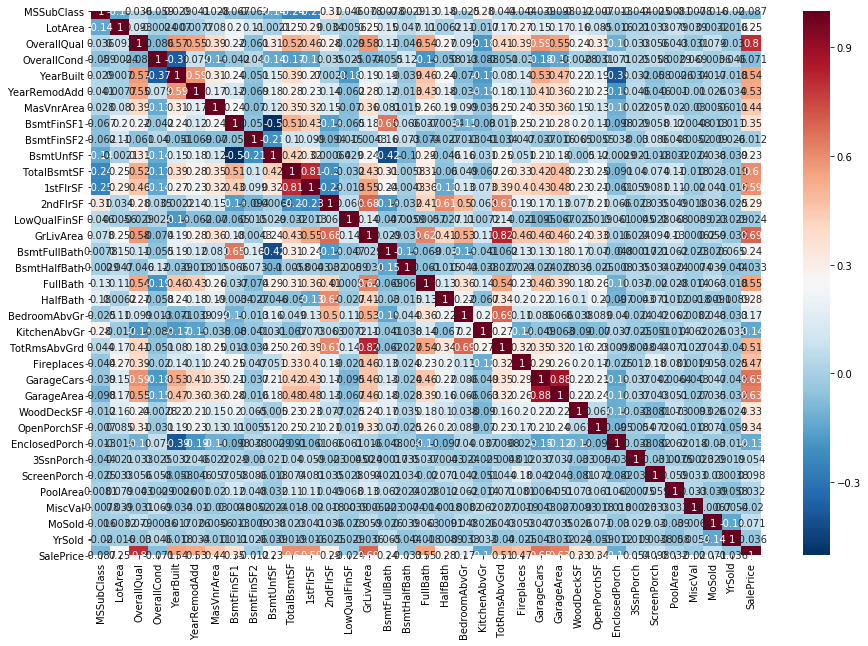

In [806]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#df_train_drop = pd.read_csv(transf_csv_file)

corr_matrix = df_train_drop.corr()
plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot= True, cmap=plt.cm.RdBu_r)

In [807]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

#TotalBsmtSF and 1stFlrSF are highly correlated! R = 0.81

#GarageCars and GarageArea are highly correlated too! R = 0.88

#GrvLivArea and TotRmsAbvGrd are highly correlated despite of not being previously related before! R = 0.81
#--------------------------------------------------------------------------#
#let's drop 1 of each pair of features according to features_evaluation.csv

#since all of those features have non-negative values, we can use chi-squared test
# to check which feature is most likely to be independent of the class 

def discard_features(df_train_drop, feat_labels, y_column, k=1,axis=1):
    df_features_list=[]
    for feat_label in feat_labels:
        df_features_list.append(df_train_drop[feat_label])
    X = pd.concat(df_features_list, axis=1)
    select_k=SelectKBest(chi2,k=k)
    X_new = select_k.fit_transform(X, y_column)
    mask_chosenfeatures = select_k.get_support()

    header_line=X.columns.values
    new_features = []
    discarded_features =[]
    for boolean, feature in zip(mask_chosenfeatures, header_line):
        if boolean:
            new_features.append(feature)
        else:
            discarded_features.append(feature)
            print("feature a ser descartada: {}".format(feature))
    print("de todas as features que foram: {}".format(header_line))
    return discarded_features

df_train_drop = pd.read_csv(transf_csv_file)

feat_labels_1=["1stFlrSF","TotalBsmtSF"]
feat_labels_2=["GarageCars","GarageArea"]
feat_labels_3=["GrLivArea","TotRmsAbvGrd"]

discarded_label_1 = discard_features(df_train_drop, feat_labels_1, y_column)
discarded_label_2 = discard_features(df_train_drop, feat_labels_2, y_column)
discarded_label_3 = discard_features(df_train_drop, feat_labels_3, y_column)

all_discarded_feats = discarded_label_1 + discarded_label_2 + discarded_label_3

df_train_drop.drop(columns=all_discarded_feats, inplace = True)

feature a ser descartada: 1stFlrSF
de todas as features que foram: ['1stFlrSF' 'TotalBsmtSF']
feature a ser descartada: GarageCars
de todas as features que foram: ['GarageCars' 'GarageArea']
feature a ser descartada: TotRmsAbvGrd
de todas as features que foram: ['GrLivArea' 'TotRmsAbvGrd']


In [808]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

#TotalBsmtSF and 1stFlrSF are highly correlated! R = 0.81

#GarageCars and GarageArea are highly correlated too! R = 0.88

#GrvLivArea and TotRmsAbvGrd are highly correlated despite of not being previously related before! R = 0.81
#--------------------------------------------------------------------------#
#let's drop 1 of each pair of features according to features_evaluation.csv

#since all of those features have non-negative values, we can use chi-squared test
# to check which feature is most likely to be independent of the class 

def discard_features(df_train_drop, feat_labels, y_column, k=1,axis=1):
    df_features_list=[]
    for feat_label in feat_labels:
        df_features_list.append(df_train_drop[feat_label])
    X = pd.concat(df_features_list, axis=1)
    select_k=SelectKBest(chi2,k=k)
    X_new = select_k.fit_transform(X, y_column)
    mask_chosenfeatures = select_k.get_support()

    header_line=X.columns.values
    new_features = []
    discarded_features =[]
    for boolean, feature in zip(mask_chosenfeatures, header_line):
        if boolean:
            new_features.append(feature)
        else:
            discarded_features.append(feature)
            print("feature a ser descartada: {}".format(feature))
    print("de todas as features que foram: {}".format(header_line))
    return discarded_features

df_train_drop = pd.read_csv(transf_csv_file)

feat_labels_1=["1stFlrSF","TotalBsmtSF"]
feat_labels_2=["GarageCars","GarageArea"]
feat_labels_3=["GrLivArea","TotRmsAbvGrd"]

discarded_label_1 = discard_features(df_train_drop, feat_labels_1, y_column)
discarded_label_2 = discard_features(df_train_drop, feat_labels_2, y_column)
discarded_label_3 = discard_features(df_train_drop, feat_labels_3, y_column)

all_discarded_feats = discarded_label_1 + discarded_label_2 + discarded_label_3

df_train_drop.drop(columns=all_discarded_feats, inplace = True)

feature a ser descartada: 1stFlrSF
de todas as features que foram: ['1stFlrSF' 'TotalBsmtSF']
feature a ser descartada: GarageCars
de todas as features que foram: ['GarageCars' 'GarageArea']
feature a ser descartada: TotRmsAbvGrd
de todas as features que foram: ['GrLivArea' 'TotRmsAbvGrd']


feature a ser descartada: YearRemodAdd
de todas as features que foram: ['YearBuilt' 'YearRemodAdd']


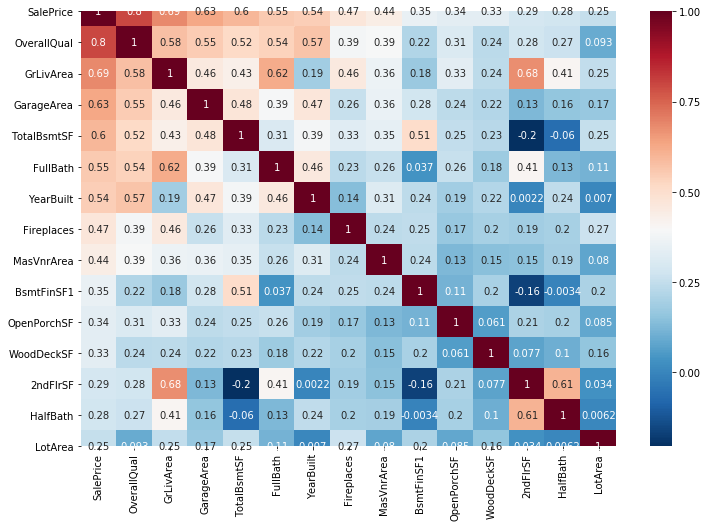

In [810]:
k = 15

#    corrrelation factor greater than 0.5 <=> 
#it has closer correlation agreement than disagreement


# however YearBuilt and YearRemodAdd they have almost the same meaning 
# so let's drop YearRemodAdd
feat_labels_4=["YearBuilt","YearRemodAdd"]

discarded_label_4 = discard_features(df_train_drop, feat_labels_4, y_column)

df_train_drop.drop(columns=discarded_label_4, inplace = True)

df_train_drop.to_csv(transf_csv_file, index= False)#no outliers

corr_matrix = df_train_drop.corr()
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
k_corr_matrix = df_train_drop[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(k_corr_matrix, annot=True, cmap=plt.cm.RdBu_r)

In [811]:
#now let's drop the rest of features
selected_features = ['OverallQual',
    'GrLivArea', 
    'GarageArea', 
    #'GarageCars',
    'TotalBsmtSF',
    #'1stFlrSF',
    'FullBath',
    #'TotRmsAbvGrd',
    'YearBuilt' 
    ]+ ['SalePrice'] # 6 features independentes entre si e R >0.5

for feat in df_train_drop.columns.values:
    
    if feat not in selected_features:
        df_train_drop.drop(feat, axis = 1, inplace = True)

In [812]:
#applying feature scaling (mean normalization) to all the selected features 
#assuming they have already been transformed from categorical to numerical

#### Scaling: Mean Normalization ####
m,n = df_train_drop.shape

maximum_features = np.zeros([1,n])
minimum_features = np.zeros([1,n])
mean_features = np.zeros([1,n])
interval_features = np.zeros([1,n])

for i in range(0,n):
    maximum_features[0,i] = df_train_drop.iloc[:,i].max()
    minimum_features[0,i] = df_train_drop.iloc[:,i].min()
    mean_features[0,i] = df_train_drop.iloc[:,i].mean()
    interval_features[0,i] = maximum_features[0,i] -  minimum_features[0,i]

list_to_normalize = range(0,n-1)
    
for i in list_to_normalize:
     df_train_drop.iloc[:,i] = (df_train_drop.iloc[:,i] - mean_features[0,i])/(interval_features[0,i])

print(df_train_drop)

      OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  GarageArea  \
0        0.102410   0.231442    -0.031827   0.038706  0.146916    0.054329   
1       -0.008701   0.035790     0.034622  -0.045695  0.146916   -0.007730   
2        0.102410   0.216949    -0.021352   0.053024  0.146916    0.096642   
3        0.102410  -0.406239    -0.048193   0.040025 -0.186417    0.120620   
4        0.213521   0.209703     0.015473   0.130643  0.146916    0.257432   
...           ...        ...          ...        ...       ...         ...   
1438    -0.008701   0.202457    -0.015951   0.026837  0.146916   -0.007730   
1439    -0.008701   0.050283     0.080448   0.107093  0.146916    0.020479   
1440     0.102410  -0.217833     0.016618   0.157395  0.146916   -0.154416   
1441    -0.119812  -0.152616     0.004507  -0.080360 -0.186417   -0.162878   
1442    -0.119812  -0.043920     0.033640  -0.046825 -0.186417   -0.137490   

      SalePrice  
0        208500  
1        181500  
2        

In [813]:
final_csv_file=transf_csv_file.replace('transf_train.csv','final_train.csv')
df_train_drop.to_csv(final_csv_file, index= False)
print(df_train_drop)


      OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  GarageArea  \
0        0.102410   0.231442    -0.031827   0.038706  0.146916    0.054329   
1       -0.008701   0.035790     0.034622  -0.045695  0.146916   -0.007730   
2        0.102410   0.216949    -0.021352   0.053024  0.146916    0.096642   
3        0.102410  -0.406239    -0.048193   0.040025 -0.186417    0.120620   
4        0.213521   0.209703     0.015473   0.130643  0.146916    0.257432   
...           ...        ...          ...        ...       ...         ...   
1438    -0.008701   0.202457    -0.015951   0.026837  0.146916   -0.007730   
1439    -0.008701   0.050283     0.080448   0.107093  0.146916    0.020479   
1440     0.102410  -0.217833     0.016618   0.157395  0.146916   -0.154416   
1441    -0.119812  -0.152616     0.004507  -0.080360 -0.186417   -0.162878   
1442    -0.119812  -0.043920     0.033640  -0.046825 -0.186417   -0.137490   

      SalePrice  
0        208500  
1        181500  
2        

In [ ]:
#Defining training and validation sets

df_train_final = pd.read_csv(final_csv_file)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from math import sqrt

df_train_final = pd.read_csv(final_csv_file)

k_fold_crossover=10

sk_fold = KFold(n_splits=k_fold_crossover)

X = df_train_final.iloc[:,:-1]
y = df_train_final.iloc[:,-1]

#getting the best hyperparameters for the random forest
gsc_rf = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(2,7), #depth of the tree
            'n_estimators': (10, 20, 50, 100,1000), #number of trees
        },
        cv=10, scoring='neg_mean_squared_error', verbose=0,  n_jobs=-1)

#getting the best hyperparameters for support vector machine

gsc_svr = GridSearchCV(
                    estimator=SVR(kernel='rbf',gamma='scale'),
                    cv=10,
                    param_grid={"C": [0.5, 1.0, 1.5, 2.0],
                               "epsilon": [0.001, 0.005, 0.01, 0.05],
                              })

#getting the best hyperparameters for ridge regression (linear regression with regularization)
gsc_ridge = GridSearchCV(Ridge(), 
                        cv=10,
                        param_grid={"alpha": [0.001, 0.01, 0.1, 1, 10],
                            })

cross_over_i = 0
    
validation_rmse = []
validation_models=[]
for train_index,validation_index in sk_fold.split(X,y):
    cross_over_i += 1
    
    X_train = X.iloc[train_index]
    X_val = X.iloc[validation_index]
    y_train = y[train_index]
    y_val = y[validation_index]
    
    X_train = np.nan_to_num(X_train)
    X_val = np.nan_to_num(X_val)


    print("Starting ",(cross_over_i)," -th cross over validation") 

    grid_result_rf = gsc_rf.fit(X_train, y_train)
    grid_result_svr = gsc_svr.fit(X_train, y_train)
    grid_result_ridge = gsc_ridge.fit(X_train, y_train)

    best_params_rf = grid_result_rf.best_params_
    best_params_svr = grid_result_svr.best_params_
    best_params_ridge = grid_result_ridge.best_params_
    
    rf = RandomForestRegressor(max_depth=best_params_rf["max_depth"], n_estimators=best_params_rf["n_estimators"],
                                random_state=False, verbose=False)
    rf.fit(X_train, y_train)
    
    svr = SVR(kernel='rbf', gamma='scale',C=best_params_svr["C"], epsilon=best_params_svr["epsilon"])
    svr.fit(X_train, y_train)
    ridge = Ridge(alpha=best_params_ridge["alpha"])
    ridge.fit(X_train, y_train)
    
    #Evaluating its Root-Mean-Squared-Error (RMSE)
    y_predicted_val_rf = rf.predict(X_val)
    y_predicted_val_svr = svr.predict(X_val)
    y_predicted_val_ridge = svr.predict(X_val)

    obtained_rmse_rf = sqrt(mean_squared_error(y_val, y_predicted_val_rf))
    obtained_rmse_svr = sqrt(mean_squared_error(y_val, y_predicted_val_svr))
    obtained_rmse_ridge = sqrt(mean_squared_error(y_val, y_predicted_val_ridge))

    
    print("RMSE Random Forest= {}".format(obtained_rmse_rf))
    print("RMSE SVR = {}".format(obtained_rmse_svr))
    print("RMSE Ridge = {}".format(obtained_rmse_ridge))

    validation_models.append((rf,svr,ridge))
    validation_rmse.append((obtained_rmse_rf,obtained_rmse_svr,obtained_rmse_ridge))

Starting  1  -th cross over validation
RMSE Random Forest= 31326.98169401795
RMSE SVR = 68983.75756303167
RMSE Ridge = 68983.75756303167
Starting  2  -th cross over validation


In [743]:
chosen_rf,_,_ = validation_models[1]

df_test_original=pd.read_csv(csv_test_file)
test_ID = df_test_original['Id']

df_test_original.drop("Id", axis = 1, inplace = True)
#preparing testing data
#now let's drop the rest of features

for feat in df_test_original.columns.values: 
    if feat not in selected_features:
        df_test_original.drop(feat, axis = 1, inplace = True)
        
transf_test_csv_file=csv_test_file.replace('test.csv','final_test.csv')
df_test_original.to_csv(transf_test_csv_file, index= False)#no outliers

In [744]:
#### Scaling: Mean Normalization ####
m,n = df_test_original.shape

list_to_normalize = range(0,n)
for i in list_to_normalize:    
    df_test_original.iloc[:,i] = ((df_test_original.iloc[:,i] - mean_features[0,i])/(interval_features[0,i]))

print(df_test_original)

      OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath    GarageArea
0             5.0     1961.0        882.0      896.0       1.0  7.300000e+02
1             6.0     1958.0       1329.0     1329.0       1.0  3.120000e+02
2             5.0     1997.0        928.0     1629.0       2.0  4.820000e+02
3             6.0     1998.0        926.0     1604.0       2.0  4.700000e+02
4             8.0     1992.0       1280.0     1280.0       2.0  5.060000e+02
...           ...        ...          ...        ...       ...           ...
1454          4.0     1970.0        546.0     1092.0       1.0 -3.693050e-18
1455          4.0     1970.0        546.0     1092.0       1.0  2.860000e+02
1456          5.0     1960.0       1224.0     1224.0       1.0  5.760000e+02
1457          5.0     1992.0        912.0      970.0       1.0 -3.693050e-18
1458          7.0     1993.0        996.0     2000.0       2.0  6.500000e+02

[1459 rows x 6 columns]


In [745]:
transf_test_csv_file=csv_test_file.replace('test.csv','final_test.csv')
df_test_original.to_csv(transf_test_csv_file, index= False)#no outliers

print(np.where(np.isnan(df_test_original.values)))

X_test_np = np.nan_to_num(df_test_original.values)
y_predicted_val = chosen_rf.predict(X_test_np)

print(y_predicted_val)

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_predicted_val
csv_prediction_file = csv_test_file.replace('test.csv','prediction.csv')
sub.to_csv(csv_prediction_file,index=False)


(array([ 660, 1116]), array([2, 5]))
[260351.9831039  260351.9831039  260351.9831039  ... 260351.9831039
 300212.82539827 260351.9831039 ]
